In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def generate_sample(seed, n):
    np.random.seed(seed)
    x_vals = np.random.uniform(0, 2*np.pi, n)
    y_vals = np.random.normal(np.sin(x_vals), 0.2)
    return x_vals, y_vals

In [11]:
x_train = generate_sample(428, 30)[0]
y_train = generate_sample(428, 30)[1]

x_test = generate_sample(824, 30)[0]
y_test = generate_sample(824, 30)[1]

x_true = np.linspace(0, 2*np.pi, 100)
y_true = np.sin(x_true)

In [12]:
def expand(x, d):
    return np.column_stack([x**i for i in range(0,d+1)])

In [13]:
def polynomial_regress(d, x, y):
    x_expansion = expand(x, d)
    reg = LinearRegression().fit(x_expansion, y)
    return reg.coef_

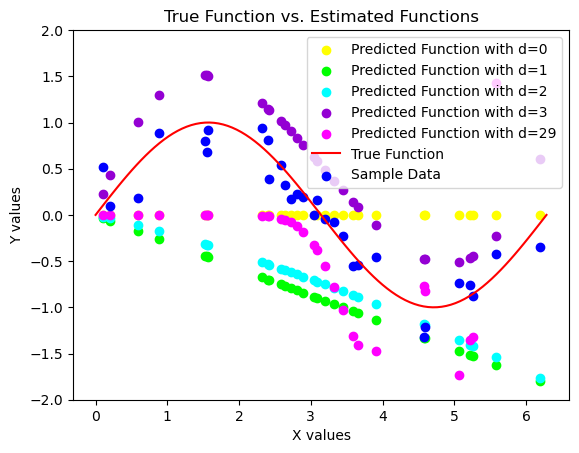

In [23]:
degrees = [0,1,2,3,29]
colors = ["yellow", "lime", "cyan", "darkviolet", "magenta"]

for i in range(len(degrees)):
    x = x_test
    y = np.dot(expand(x_test, degrees[i]), polynomial_regress(degrees[i], x_train, y_train))
    plt.scatter(x, y, color=colors[i], label="Predicted Function with d=" + str(degrees[i]))

plt.plot(x_true, y_true, color="red", label="True Function")
plt.scatter(x_test, y_test, color="blue", label="Sample Data")

ax = plt.gca()
ax.set_ylim([-2, 2])
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('True Function vs. Estimated Functions')
plt.legend()

In [17]:
expand(x_test, 3)
polynomial_regress(3, x_test, y_test)

array([ 0.        ,  1.55878437, -0.73992509,  0.07840818])

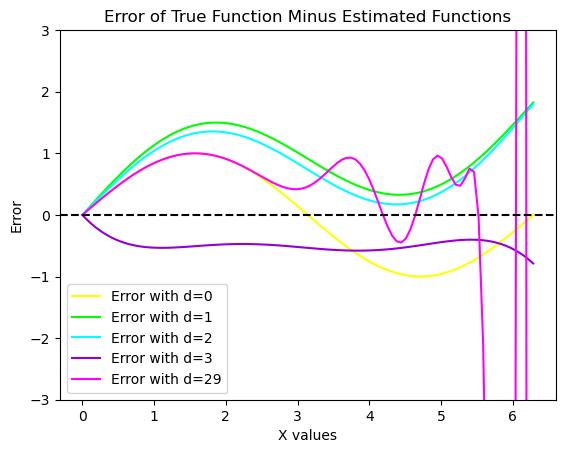

In [105]:
for i in range(len(degrees)):
    plt.plot(x_true, y_true - np.dot(polynomial_regress(degrees[i], x_vals, y_vals, x_true)[1], 
                    polynomial_regress(degrees[i], x_vals, y_vals, x_true)[0]), 
             color=colors[i], label="Error with d=" + str(degrees[i]))


ax = plt.gca()
ax.set_ylim([-3, 3])
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('X values')
plt.ylabel('Error')
plt.title('Error of True Function Minus Estimated Functions')
plt.legend()

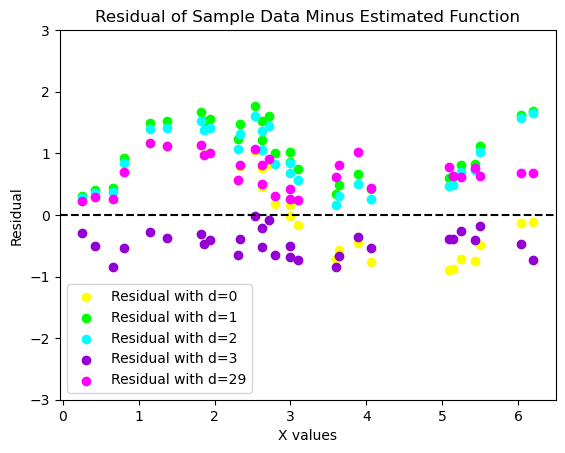

In [102]:
for i in range(len(degrees)):
    plt.scatter(x_vals, y_vals - np.dot(polynomial_regress(degrees[i], x_vals, y_vals, x_true)[2], 
                                     polynomial_regress(degrees[i], x_vals, y_vals, x_true)[0]), 
             color=colors[i], label="Residual with d=" + str(degrees[i]))

ax = plt.gca()
ax.set_ylim([-3, 3])
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('X values')
plt.ylabel('Residual')
plt.title('Residual of Sample Data Minus Estimated Function')
plt.legend()

In [57]:
y_vals

array([-0.45626262, -0.58265792,  0.32654329,  0.28074926,  0.76225745,
        0.79284836, -0.09319969, -0.78897283,  0.53211791,  0.84085242,
        0.19739174,  0.35357931,  0.63971738, -0.49217435,  0.69005054,
        0.32630407,  0.50337863, -0.84896909,  0.87223862,  0.52517173,
       -0.03938906, -0.56109655, -0.43976268,  0.41025772,  0.40346576,
        0.30147179,  0.22545215,  0.03861081,  0.0479111 ,  0.22600852])